In [122]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
from kbackground import Estimator

In [146]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

In [147]:
self = Estimator.from_mission_bkg('/Users/ch/Downloads/kplr021-2010078095331_bkg.fits.gz')

NameError: name 'x' is not defined

In [ ]:
# ws = self.ws.reshape((self.ws.shape[0], int(self.ws.shape[1]**0.5), int(self.ws.shape[1]**0.5)))

In [ ]:
x, y = np.linspace(self.x.min(), self.x.max(), 150), np.linspace(self.y.min(), self.y.max(), 150)

In [ ]:
X, Y = np.meshgrid(x, y)

In [ ]:
self.cadenceno[0]

In [154]:
from matplotlib import animation

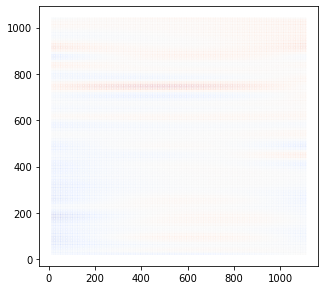

In [166]:
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.scatter(X.ravel(), Y.ravel(), c=self.model(X.ravel(), Y.ravel(), self.cadenceno[0]), s=0.01, cmap='coolwarm')
plt.gca().set_aspect('equal')

def update(idx):
    im.set_array(self.model(X.ravel(), Y.ravel(), self.cadenceno[idx]))
    return im,

anim = animation.FuncAnimation(fig, update, frames=np.arange(100), interval=30)

In [167]:
anim.save('out.mp4', writer=animation.FFMpegWriter(fps=1))

In [168]:
from IPython.display import Video

In [169]:
Video('out.mp4')

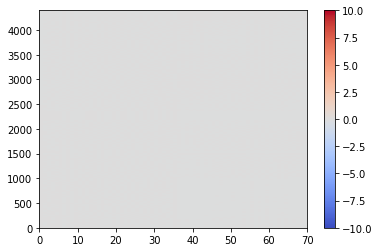

In [148]:
plt.pcolormesh(self.ws[:, 35:], vmin=-10, vmax=10, cmap='coolwarm')
plt.colorbar()

In [143]:
self.cadenceno[2200]

14114

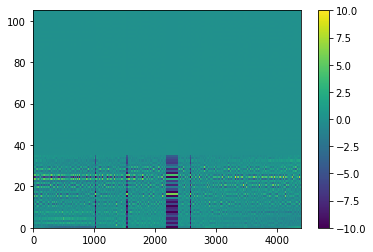

In [144]:
plt.pcolormesh(self.ws.T, vmin=-10, vmax=10)
plt.colorbar()

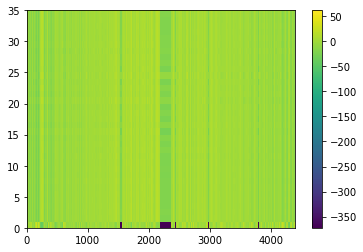

In [445]:
plt.pcolormesh(self.ws[:, 35:].T)
plt.colorbar()

In [187]:
self.xknots

In [96]:
Bs = self.A.T.dot(self.flux.T)
ws = np.linalg.solve(self.sigma_w_inv.toarray(), Bs)

In [100]:
self.sigma_w_inv.toarray()

array([[4.20000000e+03, 1.03585899e+02, 9.24367702e+01, ...,
        4.59395516e+00, 3.39976855e+00, 2.47098564e+00],
       [1.03585899e+02, 8.33543205e+01, 1.76757273e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.24367702e+01, 1.76757273e+01, 3.67703227e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.59395516e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.65814622e+00, 8.82678170e-01, 1.01116393e-01],
       [3.39976855e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.82678170e-01, 1.31295044e+00, 6.07380943e-01],
       [2.47098564e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.01116393e-01, 6.07380943e-01, 1.11621278e+00]])

array([[ 2.69092547e+01, -1.06652810e+02, -5.61459330e+00, ...,
         1.97351277e+02,  5.18081414e+01, -3.31034963e+01],
       [ 7.72888171e+02, -9.32222122e+02,  5.67829524e+02, ...,
        -1.73119140e+03, -7.34264180e+01,  6.58775084e+02],
       [-1.16799127e+03,  4.19815519e+02, -5.42633971e+02, ...,
         2.15135891e+03,  5.72454141e+02, -1.36064779e+03],
       ...,
       [ 6.77879144e+02,  7.01841423e+01,  4.11377226e+01, ...,
        -1.34209330e+02,  3.60869077e+01,  4.83026815e+02],
       [ 5.30736437e+02, -3.16515243e+02,  3.30007635e+02, ...,
        -1.24769708e+03, -6.88774456e+01,  9.05243548e+02],
       [ 2.40072716e+03, -1.08980144e+03,  3.09573998e+03, ...,
        -7.31336575e+03, -1.22364918e+03,  3.88513946e+03]])

In [75]:
self.A.T.dot(self.flux[0][:, None])

ValueError: dimension mismatch

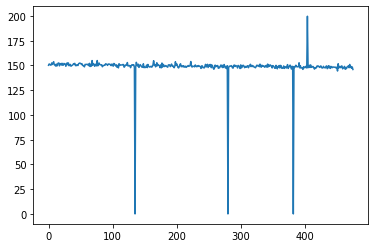

In [41]:
plt.plot(self.flux[:, 0])

<4200x4200 sparse matrix of type '<class 'numpy.float64'>'
	with 17640000 stored elements in Compressed Sparse Row format>

(array([  55.09677419,   90.19354839,  125.29032258,  160.38709677,
         195.48387097,  230.58064516,  265.67741935,  300.77419355,
         335.87096774,  370.96774194,  406.06451613,  441.16129032,
         476.25806452,  511.35483871,  546.4516129 ,  581.5483871 ,
         616.64516129,  651.74193548,  686.83870968,  721.93548387,
         757.03225806,  792.12903226,  827.22580645,  862.32258065,
         897.41935484,  932.51612903,  967.61290323, 1002.70967742,
        1037.80645161, 1072.90322581]),
 array([  59.67741935,   92.35483871,  125.03225806,  157.70967742,
         190.38709677,  223.06451613,  255.74193548,  288.41935484,
         321.09677419,  353.77419355,  386.4516129 ,  419.12903226,
         451.80645161,  484.48387097,  517.16129032,  549.83870968,
         582.51612903,  615.19354839,  647.87096774,  680.5483871 ,
         713.22580645,  745.90322581,  778.58064516,  811.25806452,
         843.93548387,  876.61290323,  909.29032258,  941.96774194,
        

In [22]:
e.y.max()

1040